In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from operator import itemgetter
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [75]:
data = pd.read_csv('/Users/anastasiafedoracenko/Desktop/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [77]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [78]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Тут видно, что данные, в целом, полные. Есть категориальные признаки их будем переводить в числовые. Например пол  и стенокардию можно через labelEncoding перевести, а ЭКГ, тип боли в груди  и наклон сигмента ST через get dummies.

In [79]:
le = LabelEncoder()

In [80]:
le.fit(data['Sex'])
data['Sex_'] = le.transform(data['Sex'])
le.fit(data['ExerciseAngina'])
data['ExerciseAngina_'] = le.transform(data['ExerciseAngina'])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_,ExerciseAngina_
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,0


In [81]:
del data['Sex'], data['ExerciseAngina']

In [83]:
df = pd.get_dummies(data, columns = ['RestingECG', 'ST_Slope', 'ChestPainType'])
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_,ExerciseAngina_,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1,0,1,0,0
3,48,138,214,0,108,1.5,1,0,1,0,1,0,0,1,0,1,0,0,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,0,1,0,0,0,0,1
914,68,144,193,1,141,3.4,1,1,0,0,1,0,0,1,0,1,0,0,0
915,57,130,131,0,115,1.2,1,1,1,0,1,0,0,1,0,1,0,0,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_               918 non-null    int64  
 8   ExerciseAngina_    918 non-null    int64  
 9   RestingECG_LVH     918 non-null    uint8  
 10  RestingECG_Normal  918 non-null    uint8  
 11  RestingECG_ST      918 non-null    uint8  
 12  ST_Slope_Down      918 non-null    uint8  
 13  ST_Slope_Flat      918 non-null    uint8  
 14  ST_Slope_Up        918 non-null    uint8  
 15  ChestPainType_ASY  918 non-null    uint8  
 16  ChestPainType_ATA  918 non

Для визуального анализа буду использовать данные до get_dummies, что бы не было слишком много признаков

<Figure size 864x648 with 0 Axes>

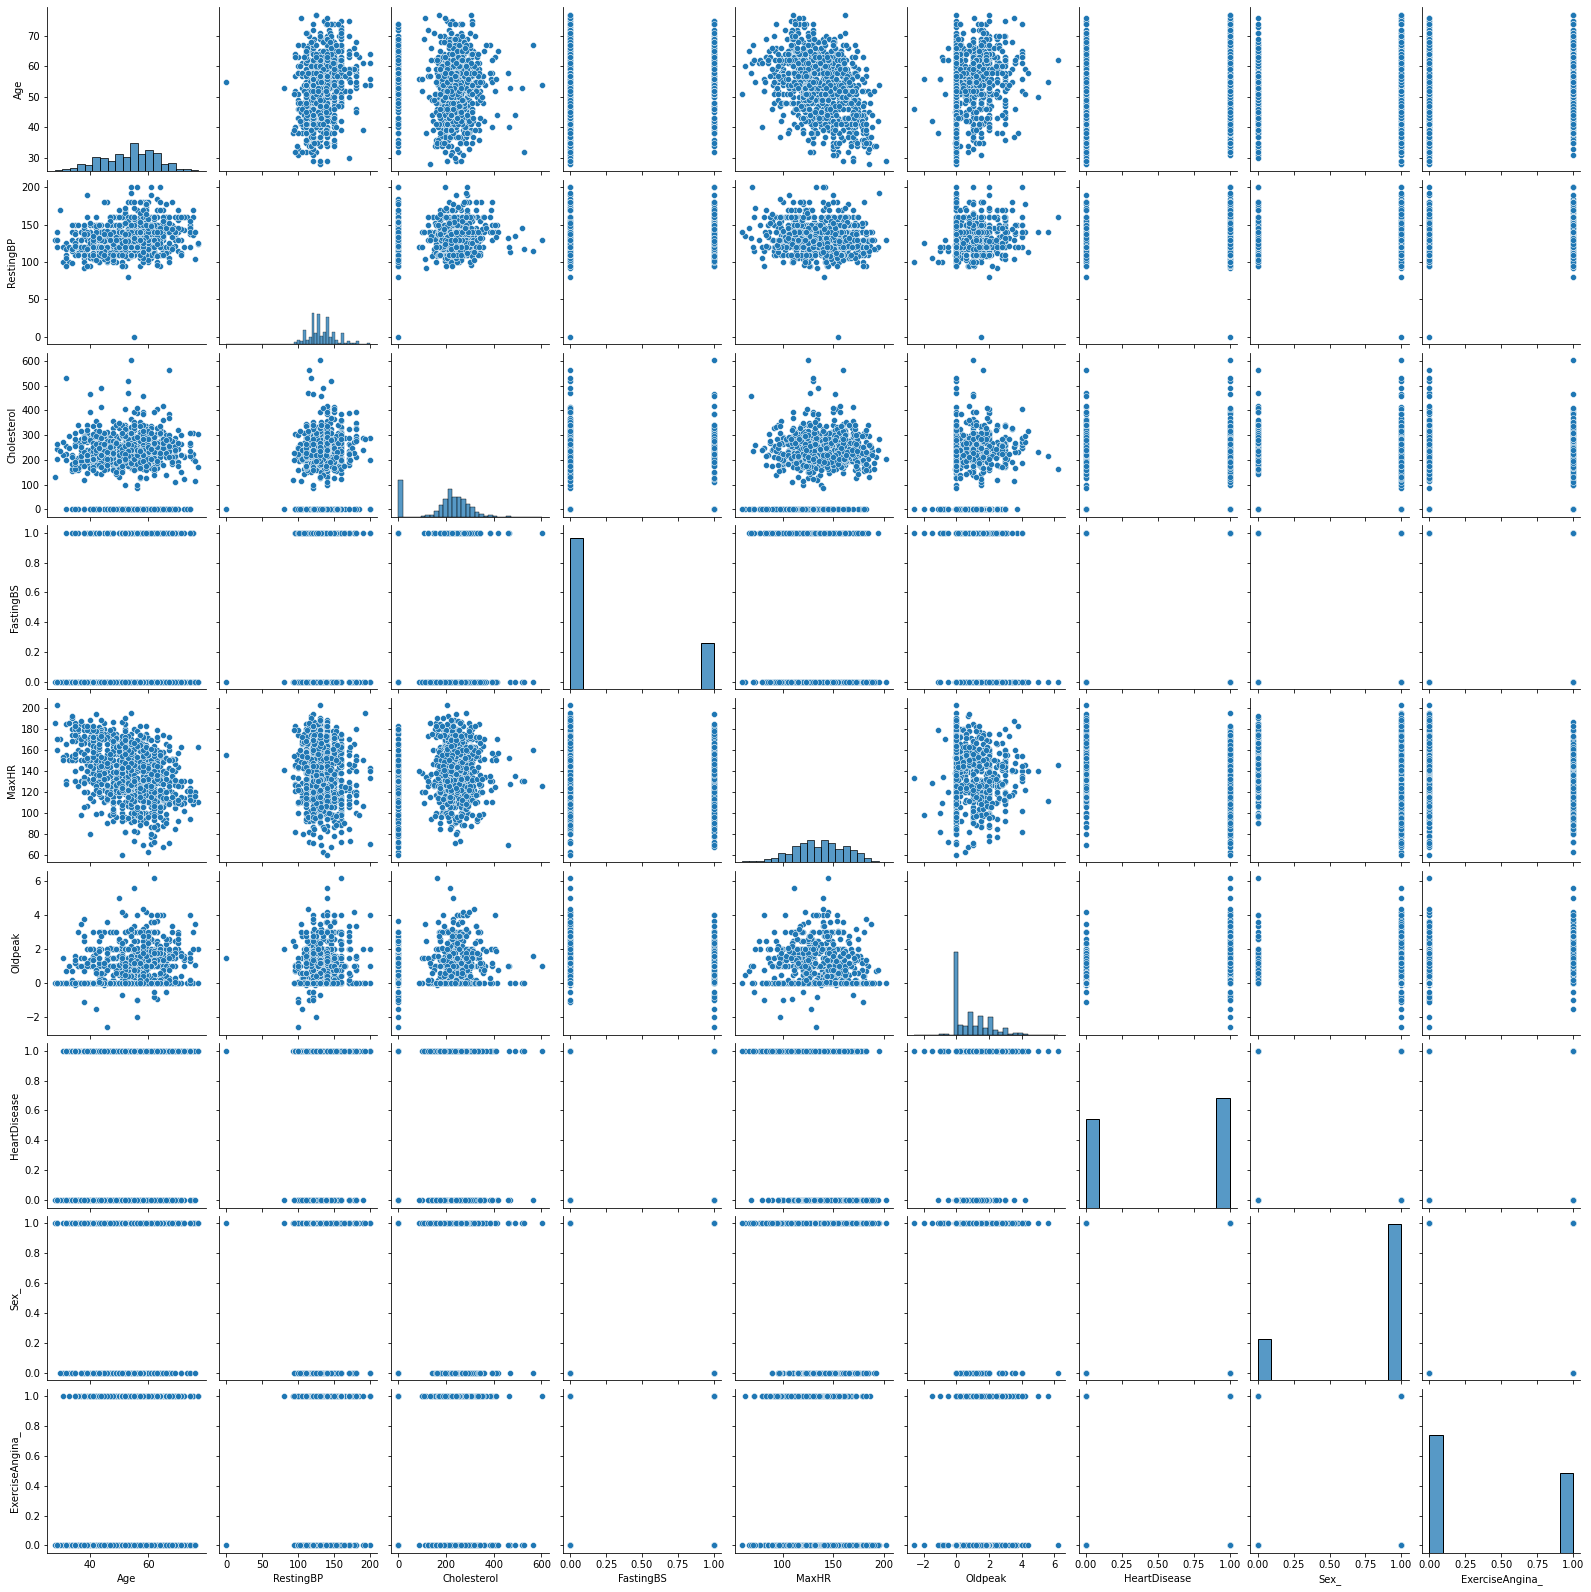

In [85]:
plt.figure(figsize = (12,9))
sns.pairplot(data)

По пэйплоту видно зависимости, видно даже несколько выбросов, которые, по-хорошему надо бы обработать. Хочу еще посмотреть на коррелирующую матрицу, может будет видно зависимости, которых тут не явно видно, но корр. матрицу будем смотреть уже на итоговом дф

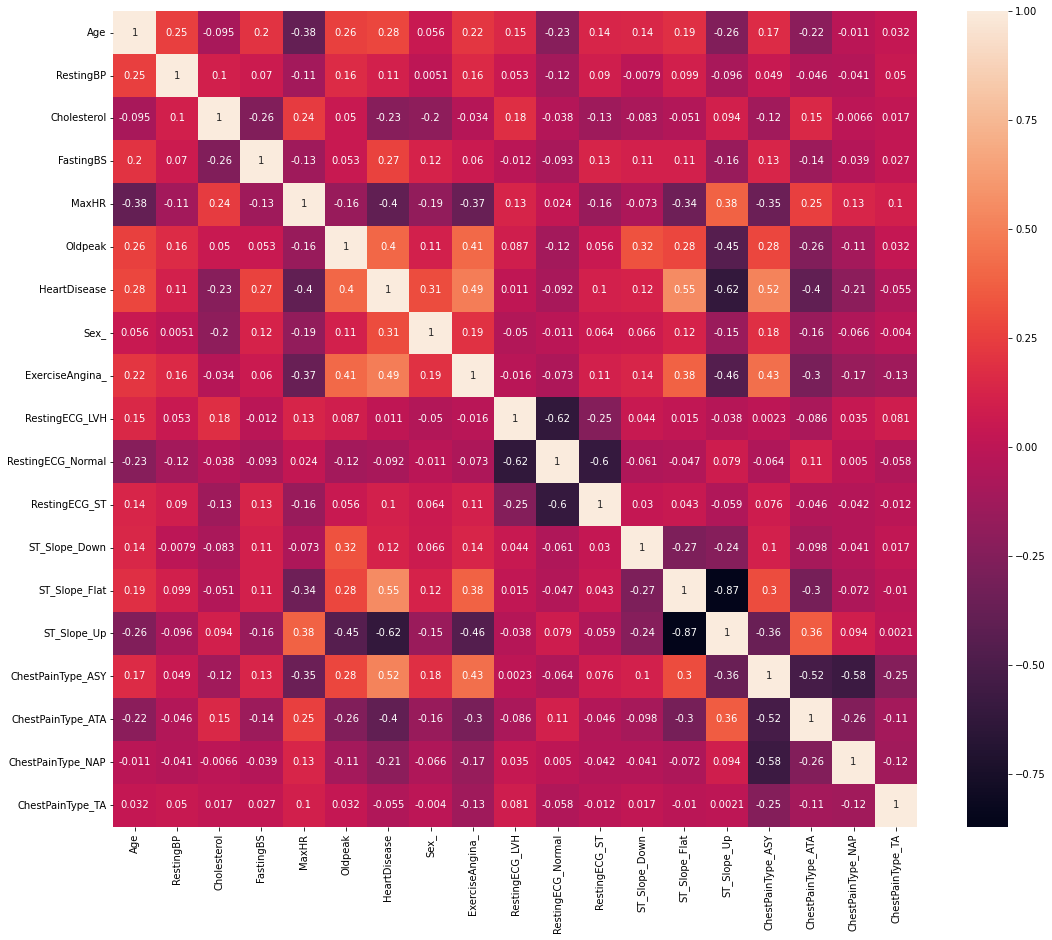

In [95]:
corr = df.corr()
plt.figure(figsize = (18,15))
sns.heatmap(corr, annot = True)
plt.show()

Окей, да, есть признаки с корреляцией, не сильной, но явно выделяющейся. 

In [91]:
x = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_', 'ExerciseAngina_',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']]
y = df['HeartDisease']

In [96]:
x_test, x_train, y_test, y_train = train_test_split(x, y, random_state = 7, test_size = 0.2)

In [109]:
DTC = DecisionTreeClassifier(random_state = 7)
DTC = DTC.fit(x_train, y_train)

In [113]:
y_pred_DTC = DTC.predict(x_test)
y_pred_DTC

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [112]:
RFC = RandomForestClassifier( random_state = 7)
RFC = RFC.fit(x_train, y_train)

In [115]:
y_pred_RFC = RFC.predict(x_test)
y_pred_RFC

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [117]:
report_DTC = classification_report(y_test, y_pred_DTC)
print(report_DTC)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       320
           1       0.82      0.77      0.80       414

    accuracy                           0.78       734
   macro avg       0.78      0.78      0.78       734
weighted avg       0.78      0.78      0.78       734



In [118]:
report_RFC = classification_report(y_test, y_pred_RFC)
print(report_RFC)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       320
           1       0.87      0.86      0.87       414

    accuracy                           0.85       734
   macro avg       0.85      0.85      0.85       734
weighted avg       0.85      0.85      0.85       734



In [120]:
imp_RFC = pd.DataFrame(RFC.feature_importances_, index = x.columns)
imp_RFC

,0
Age,0.083994
RestingBP,0.054035
Cholesterol,0.066926
FastingBS,0.029171
MaxHR,0.106085
Oldpeak,0.100375
Sex_,0.059017
ExerciseAngina_,0.045521
RestingECG_LVH,0.009229
RestingECG_Normal,0.013052


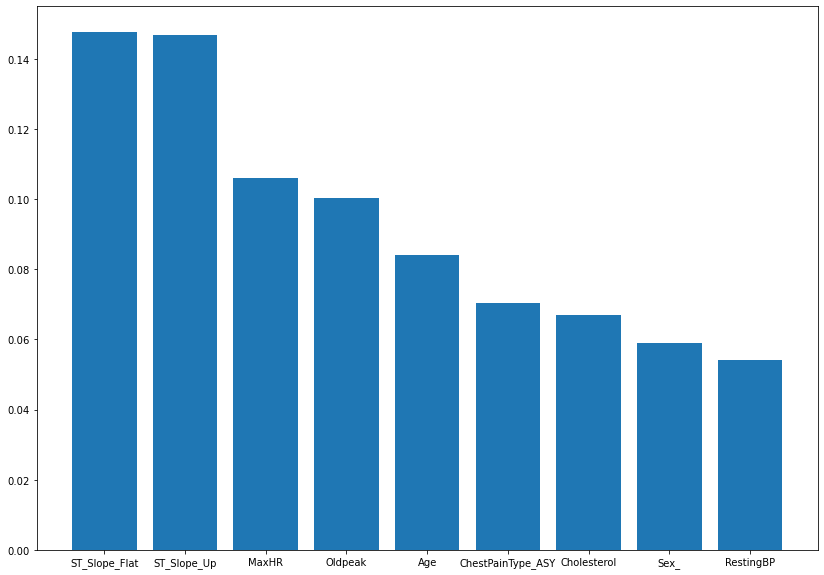

In [125]:
featurse_RFC = dict()

for feature in imp_RFC.index:
    if imp_RFC.loc[feature, 0] > 0.05:
        featurse_RFC[feature] = imp_RFC.loc[feature, 0]

features_sort_RFC = {key: value for key, value in sorted(featurse_RFC.items(), key = itemgetter(1), reverse = True)}

plt.figure(figsize = (14, 10))
plt.bar(features_sort_RFC.keys() , features_sort_RFC.values())
plt.show()

In [130]:
bagging_DTC = BaggingClassifier(DTC, max_samples = 0.5, max_features = 0.5, 
                              random_state = 7)

In [133]:
bagging_DTC = bagging_DTC.fit(x_train, y_train)
pred_bagging_DTC = bagging_DTC.predict(x_test)

In [134]:
report_bagging_DTC = classification_report(y_test, pred_bagging_DTC)
print(report_bagging_DTC)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       320
           1       0.88      0.80      0.84       414

    accuracy                           0.83       734
   macro avg       0.82      0.83      0.82       734
weighted avg       0.83      0.83      0.83       734



In [141]:
estimators = [('DTC', DTC),
              ('RFC', RFC), 
              ('SVC', make_pipeline(StandardScaler(), LinearSVC(random_state = 7)))]

In [142]:
SC = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [143]:
SC.fit(x_train, y_train)

StackingClassifier(estimators=[('DTC', DecisionTreeClassifier(random_state=7)),
                               ('RFC', RandomForestClassifier(random_state=7)),
                               ('SVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=7))]))],
                   final_estimator=LogisticRegression())

In [144]:
pred_SC = SC.predict(x_test)

In [145]:
report_SC = classification_report(y_test, pred_SC)
print(report_SC)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       320
           1       0.85      0.88      0.87       414

    accuracy                           0.85       734
   macro avg       0.85      0.84      0.85       734
weighted avg       0.85      0.85      0.85       734



In [148]:
score_train = {}
score_test = {}

for i in SC.named_estimators:
    score_train[i] = SC.named_estimators_[i].score(x_train, y_train)
    score_test[i] = SC.named_estimators_[i].score(x_test, y_test)

score_train['Total']= SC.score(x_train, y_train)
score_test['Total']= SC.score(x_test, y_test)

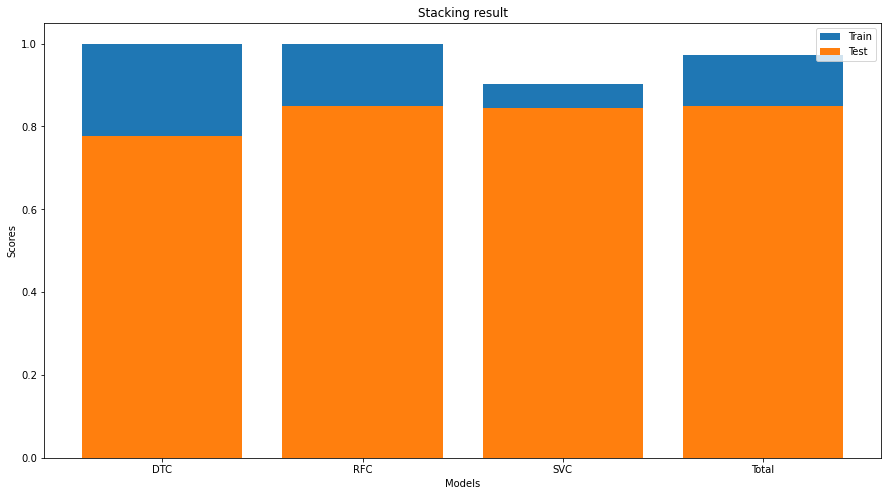

In [151]:
plt.figure(figsize = (15, 8))
plt.bar(range(len(score_train)), score_train.values(), align = "center", label = 'Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align = "center", label = 'Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

Ну, деревья явно выдали одинаково хороший результат на обучение, но на тесте Random Forest был лучше. 